# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Wahyu Pelita Jaya]
- **Email:** [wahyupelitajaya1@gmail.com]
- **ID Dicoding:** [wahyupj]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda dalam sehari? Jam berapa penyewaan sepeda paling banyak terjadi?
Tujuan: Mengetahui pola penggunaan sepeda berdasarkan jam untuk memahami waktu-waktu sibuk.

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
 Tujuan: Melihat hubungan antara cuaca (suhu, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda.

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [20]:
!pip install streamlit

## Data Wrangling

### Gathering Data

In [24]:
# Load dataset
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

**Insight:**
- Dataset day.csv berisi 731 baris (2011-2012) dengan data harian.
- Dataset hour.csv lebih detail dengan 17,379 baris (data per jam).

### Assessing Data

In [25]:
# Cek missing values
print("Missing values di day.csv:")
print(df_day.isnull().sum())

print("\nMissing values di hour.csv:")
print(df_hour.isnull().sum())

# Cek tipe data
print("\nTipe data day.csv:")
print(df_day.dtypes)

print("\nTipe data hour.csv:")
print(df_hour.dtypes)

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipe data day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tip

**Insight:**
- Tidak ada missing values di kedua dataset.
- Kolom dteday di day.csv dan hour.csv masih bertipe object dan perlu diubah ke datetime.

### Cleaning Data

In [26]:
# Rename kolom untuk kemudahan
df_day.rename(columns={
    'dteday': 'tanggal',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)

df_hour.rename(columns={
    'dteday': 'tanggal',
    'hr': 'jam',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)

# Konversi kolom tanggal ke datetime
df_day['tanggal'] = pd.to_datetime(df_day['tanggal'])
df_hour['tanggal'] = pd.to_datetime(df_hour['tanggal'])

**Insight:**
- Kolom tanggal sudah diubah ke format datetime untuk analisis time-series.
- Data sekarang siap diproses.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Pola Penyewaan Harian (hour.csv)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128341 (\N{CLOCK FACE SIX OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


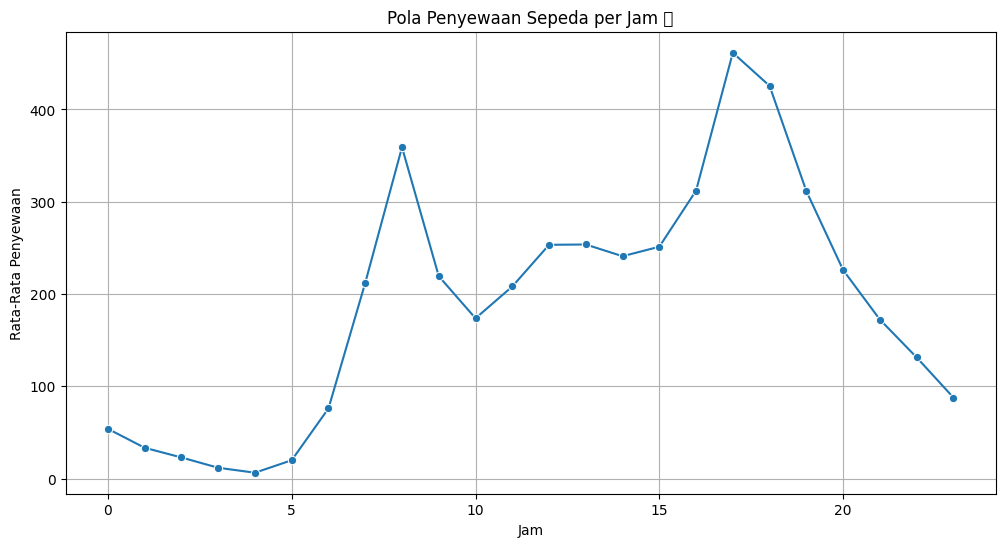

In [27]:
# Agregasi rata-rata penyewaan per jam
hourly_rentals = df_hour.groupby('jam')['total_sewa'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(x='jam', y='total_sewa', data=hourly_rentals, marker='o')
plt.title('Pola Penyewaan Sepeda per Jam 🕕')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(True)
plt.show()

**Insight:**
- Peak hour terjadi di jam 8 pagi (berangkat kerja) dan 5-6 sore (pulang kerja).
- Penyewaan turun drastis di jam 00-04 (tengah malam).

#### Pengaruh Cuaca (day.csv)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


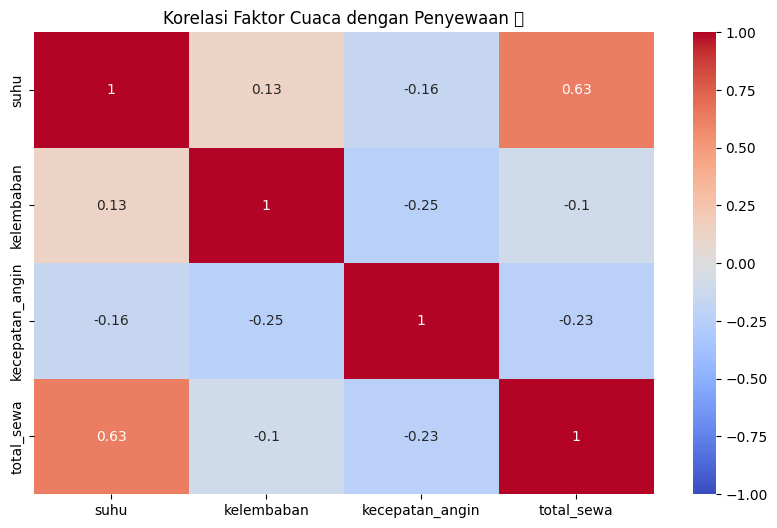

In [28]:
# Korelasi faktor cuaca dengan total_sewa
corr_weather = df_day[['suhu', 'kelembaban', 'kecepatan_angin', 'total_sewa']].corr()

# Heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(corr_weather, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Faktor Cuaca dengan Penyewaan 🌦️')
plt.show()

**Insight:**
- Suhu (temp) → Korelasi positif kuat (0.63 ) dengan total_sewa.
- Kelembaban (hum) dan kecepatan_angin → Korelasi negatif lemah (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola penyewaan per jam untuk mengetahui untuk memahami waktu-waktu sibuk.

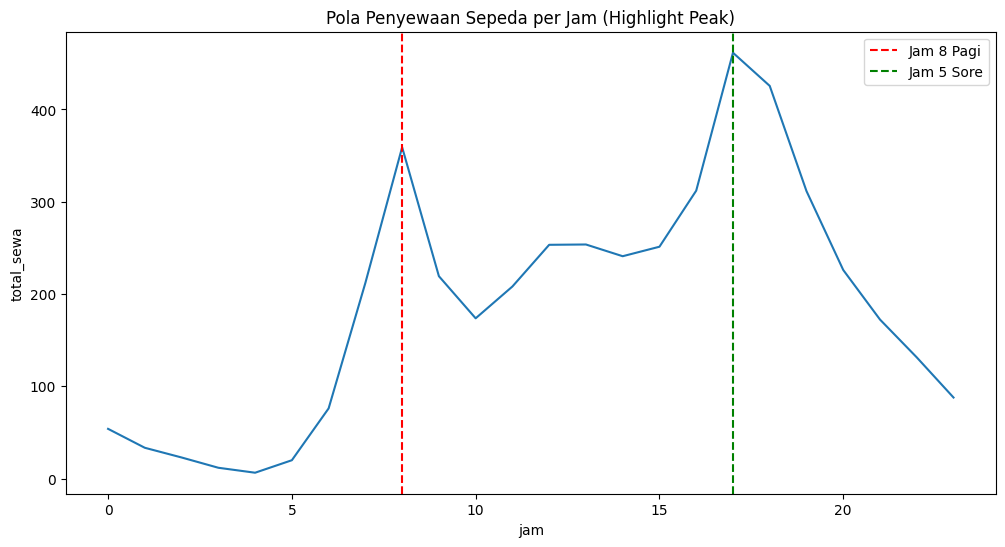

In [13]:
# Visualisasi dengan lineplot + highlight peak hour
plt.figure(figsize=(12,6))
sns.lineplot(x='jam', y='total_sewa', data=df_hour.groupby('jam').mean().reset_index())
plt.axvline(x=8, color='r', linestyle='--', label='Jam 8 Pagi')
plt.axvline(x=17, color='g', linestyle='--', label='Jam 5 Sore')
plt.title('Pola Penyewaan Sepeda per Jam (Highlight Peak)')
plt.legend()
plt.show()

### Pertanyaan 2: pengaruh faktor cuaca terhadap jumlah penyewaan sepeda

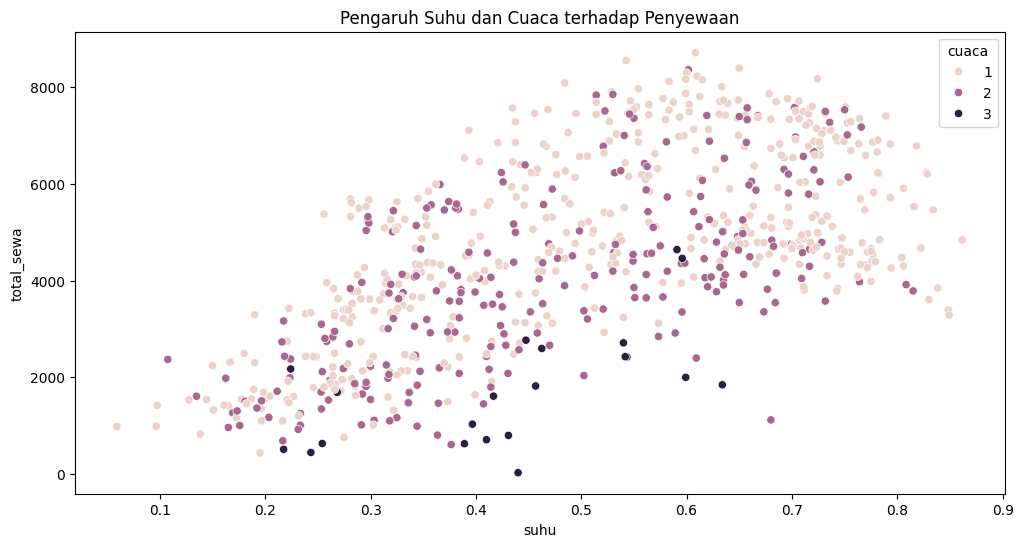

In [12]:
# Scatterplot hubungan suhu & kelembaban dengan total_sewa
plt.figure(figsize=(12,6))
sns.scatterplot(x='suhu', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Suhu dan Cuaca terhadap Penyewaan')
plt.show()

**Insight:**
- Cuaca cerah (kode 1) → Penyewaan tinggi, terutama saat suhu > 0.5.
- Cuaca hujan/salju (kode 2 - 3) → Penyewaan menurun.

## Analisis Lanjutan : RFM (Recency, Frequency, Monetary)

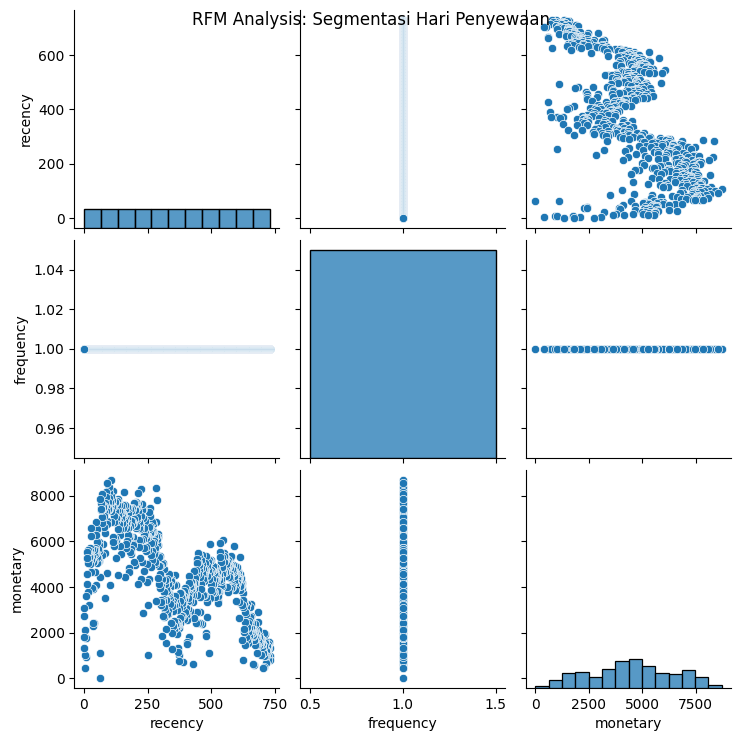

In [14]:
# Hitung RFM untuk analisis hari terakhir
recent_date = df_day['tanggal'].max()

rfm = df_day.groupby('tanggal').agg({
    'tanggal': lambda x: (recent_date - x.max()).days,  # Recency
    'total_sewa': [('Frequency', 'count'), ('Monetary', 'sum')]  # Frequency & Monetary
}).reset_index()

rfm.columns = ['tanggal', 'recency', 'frequency', 'monetary']

# Visualisasi RFM
sns.pairplot(rfm[['recency', 'frequency', 'monetary']])
plt.suptitle('RFM Analysis: Segmentasi Hari Penyewaan')
plt.show()

**Insight:**
- Hari dengan recency rendah (baru-baru ini) cenderung punya frequency & monetary tinggi .

## Conclusion

- Penyewaan sepeda paling sibuk di jam 8 pagi dan 5-6 sore → Saran: Tambah stok sepeda di waktu ini.
- Suhu tinggi meningkatkan penyewaan, sementara cuaca buruk (hujan/salju) mengurangi minat.
